Integrantes:<br>
Heloísa Pazeti - 14577991<br>
Miguel Rodrigues Fonseca - 14682196<br>

# Trabalho 2 de Cálculo numérico

In [1]:
#BIBLIOTECAS UTILIZADAS
import numpy as np
import matplotlib.pylab as plt
from scipy import sparse
import scipy as scp
import plotly.graph_objects as go

## Exercício 1

Considerar uma membrana quadrada de lados L1 = L2 =1, com<br>
espesura $e = 1$, densidade $\rho = 1$ e tensão $\sigma = 1$.<br>

Calcular as primeiras 4 frequências de oscilação da membrana como função do tamanho da grade. <br>
Tomar $N1 = N2 = 11, 21, 31, 41, 51, 61, 81, 101$.<br>

Usar a função scipy.sparse.linalg.eigsh, especificando $k = 4$. <br>
Mostrar os resultados em forma de gráfico e tabela.<br>

In [2]:
def ij2n (i, j, N):
    return i + j*N

def BuildMatrizesEigen(N1, N2, sigma, rho, e, delta):
    nunk = N1*N2

    # Stiffness matrix K: Build it as a sparse matrix 
    d1 = 4.0*np.ones(nunk)
    d2 = -np.ones(nunk-1)
    d3 = -np.ones(nunk-N1)
    K = (sigma/delta**2)*scp.sparse.diags([d3, d2, d1, d2, d3], [-N1, -1, 0, 1, N1], format='csr')

    # Force the eigenvalues associated to boundary points 
    # to be a big number as compared to fundamental modes
    big_number = 10000
    Iden = big_number*scp.sparse.identity(nunk, format='csr')

    # Lados verticais
    for k in range(0,N2):
        Ic = ij2n(0,k,N1) # Left
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

        Ic = ij2n(N1-1,k,N1) # Right
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]
        
    # Lados horizontais
    for k in range(0,N1):
        Ic = ij2n(k,0,N1) # Bottom
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

        Ic = ij2n(k,N2-1,N1) # Top
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

    # Mass matrix: Simple case, multiple of identity
    M = rho*e*scp.sparse.identity(nunk, format='csr')
    
    return K, M  

In [3]:
N=[11, 21, 31, 41, 51, 61, 81, 101]    #TAMANHO DAS GRADES ("precisão")
freqNum=4                              #NUMERO DE FREQUENCIAS QUE SERÃO CALCULADAS

Freq=np.zeros(shape=(len(N),freqNum))  #MATRIZ QUE VAI ARMAZENAR AS FREQUENCIAS DE ACORDO COM O TAMANHO DE GRADE

L1=L2=1         #DISCRETIZAÇÕES DO PROBLEMA
sigma=rho=e=1

for i in range (len(N)):

    delta=L1/(N[i]-1)   #CALCULO DO DELTA ENTRE CADA PONTO DA GRADE
    K,M=BuildMatrizesEigen(N[i], N[i], sigma, rho, e, delta) #MONTANDO AS MATRIZES KM

    Lam, Q = scp.sparse.linalg.eigsh(K, k=freqNum, M=M, which='SM') #CALCULO DAS 4 PRIMEIRAS FREQUENCIAS DE OSCILACAO
    omegas = np.sqrt(Lam)

    for j in range (freqNum): #ARMAZENANDO AS FREQUENCIAS ENCONTRADAS
        Freq[i][j]=omegas[j]


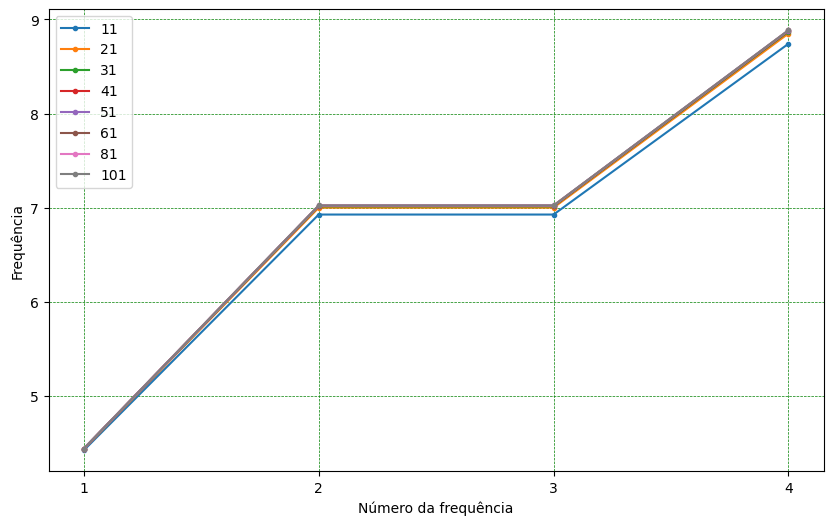

In [4]:
F=[1,2,3,4]
plt.figure(figsize=(10,6))
for i in range (len(N)):
    plt.plot(F[:],Freq.T[:,i],marker = '.')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("Número da frequência")
plt.ylabel("Frequência")
plt.xticks(F)
plt.legend(N) 
plt.show()

Freq=np.round(Freq,4)
fig = go.Figure(data=[go.Table(header=dict(values=['N','f1','f2','f3', 'f4']),
                cells=dict(values=[N,Freq.T[0,:],Freq.T[1,:],Freq.T[2,:],Freq.T[3,:]]))
                     ])
fig.update_layout(width=650,height=240,margin_b=1,margin_l=1,margin_r=1,margin_t=50,
                  title_text="Relação entre tamanho da grade e frequências de oscilação da membrana")
fig.show()


## Exercício 2
Repetir o exercício anterior, mas agora<br>
para uma membrana de forma triangular.<br>

Equação do triangulo:<br>
    $x>0.1$<br>
    $y<-0.5x+0.95$<br>
    $y>0.5x+0.05$

In [5]:
def ij2n (i, j, N):
    return i + j*N

def BuildMatrizesEigenTri(N1, N2, sigma, rho, e, delta):
    nunk = N1*N2

    # Stiffness matrix K: Build it as a sparse matrix 
    d1 = 4.0*np.ones(nunk)
    d2 = -np.ones(nunk-1)
    d3 = -np.ones(nunk-N1)
    K = (sigma/delta**2)*scp.sparse.diags([d3, d2, d1, d2, d3], [-N1, -1, 0, 1, N1], format='csr')

    # Force the eigenvalues associated to boundary points 
    # to be a big number as compared to fundamental modes
    big_number = 100000
    Iden = big_number*scp.sparse.identity(nunk, format='csr')

    for i in range(N1):
        xi=i*delta
        for j in range(N2):
            yj=j*delta
            if((xi<0.1) or (yj>0.95-(0.5*xi)) or (yj<(0.5*xi)+0.05)): #ponto cai FORA do triangulo?
                Ic = ij2n(i,j,N1)
                K[Ic,:] = Iden[Ic,:] #stiffness alterado, deixa]
                K[:,Ic] = Iden[:,Ic] #stiffness alterado, deixa]

    # Mass matrix: Simple case, multiple of identity
    M = rho*e*scp.sparse.identity(nunk, format='csr')
    
    return K, M  

In [6]:
N=[11, 21, 31, 41, 51, 61, 81, 101]    #TAMANHO DAS GRADES ("precisão")
freqNum=4                              #NUMERO DE FREQUENCIAS QUE SERÃO CALCULADAS

Freq=np.zeros(shape=(len(N),freqNum))  #MATRIZ QUE VAI ARMAZENAR AS FREQUENCIAS DE ACORDO COM O TAMANHO DE GRADE

L1=L2=1         #DISCRETIZAÇÕES DO PROBLEMA
sigma=rho=e=1

for i in range (len(N)):

    delta=L1/(N[i]-1)   #CALCULO DO DELTA ENTRE CADA PONTO DA GRADE
    K,M=BuildMatrizesEigenTri(N[i], N[i], sigma, rho, e, delta) #MONTANDO AS MATRIZES KM

    Lam, Q = scp.sparse.linalg.eigsh(K, k=freqNum, M=M, which='SM') #CALCULO DAS 4 PRIMEIRAS FREQUENCIAS DE OSCILACAO
    omegas = np.sqrt(Lam)

    for j in range (freqNum): #ARMAZENANDO AS FREQUENCIAS ENCONTRADAS
        Freq[i][j]=omegas[j]


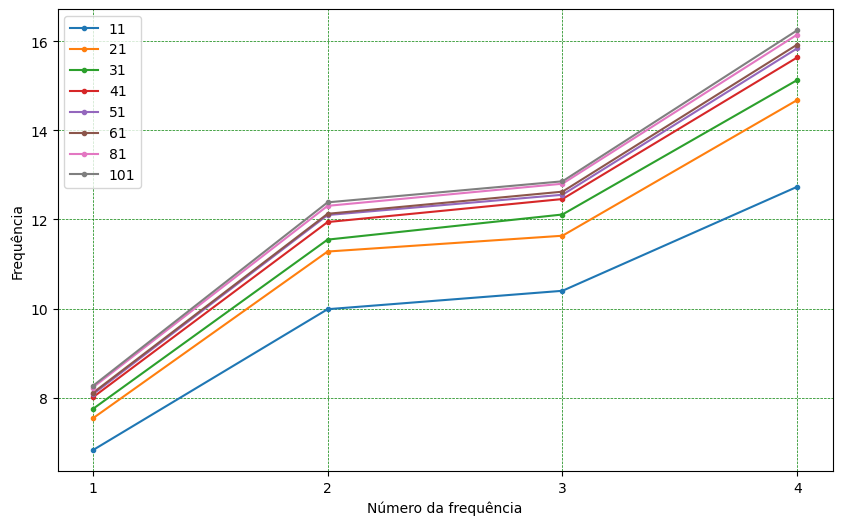

In [7]:
F=[1,2,3,4]
plt.figure(figsize=(10,6))
for i in range (len(N)):
    plt.plot(F[:],Freq.T[:,i],marker = '.')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("Número da frequência")
plt.ylabel("Frequência")
plt.xticks(F)
plt.legend(N) 
plt.show()

Freq=np.round(Freq,4)
fig = go.Figure(data=[go.Table(header=dict(values=['N','f1','f2','f3', 'f4']),
                cells=dict(values=[N,Freq.T[0,:],Freq.T[1,:],Freq.T[2,:],Freq.T[3,:]]))
                     ])
fig.update_layout(width=650,height=240,margin_b=1,margin_l=1,margin_r=1,margin_t=50,
                  title_text="Relação entre tamanho da grade e frequências de oscilação da membrana")
fig.show()


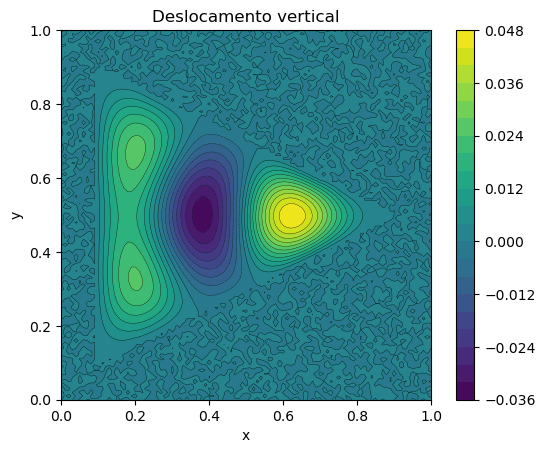

In [8]:
#Visualização, conferindo se a membrana está correta
def PlotaMembrane(N1,N2,L1,L2,W):
    x = np.linspace(0, L1, N1)
    y = np.linspace(0, L2, N2)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(W)
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Deslocamento vertical')
    im = ax.contourf(X, Y, Z, 20)
    im2 = ax.contour(X, Y, Z, 20, linewidths=0.25, colors='k')
    fig.colorbar(im, ax=ax)
    plt.show()

k = 3
mode = Q[:,k]

Wplot = mode.reshape(N[7],N[7])
PlotaMembrane(N[7],N[7],L1,L2,Wplot)

## Conclusão

Como podemos ver no primeiro exercício, tanto o gráfico do valor de frequências pelo número delas<br> quanto a tabela de valores possuem uma padrão a ser destacado.<br>
Podemos ver claramente que as frequências calculadas nas matrizes que possuem $N>=31$ possuem basicamente os mesmos valores na prática e são extremamente próximas.<br>

Isso nos levou a concluir que para casos de cálculo de membranas há sempre um valor prático de precisão $N$ que seja<br> satisfatório o suficiente na prática e que possa ser computado de forma eficiente, já que no caso do exercício<br> 1 por exemplo nós estamos "jogando fora" tempo de execução para resolver o problema de membranas para valores<br> de $N>31$ pois já estamos muito próximos do valor real do problema para valores de $N$ menores.

Já no segundo exercício a conclusão foi parecida com a do primeiro, mas com o detalhe de que esse "valor prático"<br> de N já não é tão claro assim.
A ideia de que com esses dados podemos fazer a melhor escolha para calcular problemas práticos<br> continua a mesma, porém é possível perceber que no caso da membrana triangular os valores de frequência demoram mais para estabilizar perto de algo<br> e acreditamos que seja pelo aumento da complexidade geométrica do problema, assim computar esses valores é uma tarefa<br> bem mais complexa até mesmo por conta das variações no cálculo das coordenadas para determinação do formato da membrana.

Por conta desses problemas citados é complicado chegar perto de um valor "real" e "fixo" sempre que o cálculo das frequências<br> for feito, porém é seguro dizer que o método se aproxima muito da mesma faixa de valores e os problemas não afetam significativamente os resultados que encontramos.

No geral o trabalho nos deu mais uma forma de pensar e analisar situações de "custo computacional vs precisão", não necessariamente essas análises precisam<br>
ser feitas dessa maneira apenas em problemas de membranas, elas podem ser aplicadas em diversas áreas de aplicações reais e certamente serão muito uteis no futuro